In [1]:
# library imports
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../clean_data/train_median_impute.csv")
train_df.head()

,Unnamed: 0,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,0,487,10.0,5.0,0.05,0.05,0.1785,0.2525,21.5,31.0,...,0.0,1.0,1.0,1.6,0.2,7.80,7.60,0,0,0
1,1,1555,10.0,5.0,0.05,0.05,0.1785,0.2525,21.5,31.0,...,0.0,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,2,205,10.0,10.0,0.05,0.24,0.1785,0.1000,21.5,31.0,...,0.0,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,3,1228,10.0,5.0,0.09,0.05,0.6410,0.9320,21.5,31.0,...,1.0,1.0,1.0,0.5,0.5,7.44,7.58,0,0,0
4,4,470,10.0,5.0,0.06,0.05,0.1785,0.2525,21.5,31.0,...,0.0,1.0,1.0,0.2,44.0,7.70,8.00,0,1,0


In [3]:
test_df = pd.read_csv("../clean_data/test_median_impute.csv")
test_df.head()

,Unnamed: 0,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,...,Taste-ball-units_2019,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020
0,0,163,5.0,5.0,0.08,0.08,0.071,0.0620,130.0,102.0,...,0.0,0.0,1.0,1.0,1.18,1.90,8.17,8.12,0,0
1,1,167,5.0,5.0,0.08,0.08,0.106,0.1065,34.0,26.0,...,0.0,0.0,1.0,3.0,3.90,1.54,7.83,7.81,1,0
2,2,171,5.0,5.0,0.05,0.05,0.106,0.1065,112.0,90.0,...,0.0,0.0,2.0,1.0,1.40,1.50,7.50,7.60,0,1
3,3,174,5.0,5.0,0.05,0.09,0.072,0.0750,248.0,243.0,...,0.0,0.0,2.0,8.0,1.00,1.00,7.70,7.80,0,0
4,4,178,5.0,5.0,0.05,0.05,0.106,0.1065,34.0,26.0,...,0.0,0.0,1.0,1.0,1.00,1.00,7.50,7.40,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        440 non-null    int64  
 1   station_id                        440 non-null    int64  
 2   Aluminium_2019                    440 non-null    float64
 3   Aluminium_2020                    440 non-null    float64
 4   Ammonium_2019                     440 non-null    float64
 5   Ammonium_2020                     440 non-null    float64
 6   Boron_2019                        440 non-null    float64
 7   Boron_2020                        440 non-null    float64
 8   Chloride_2019                     440 non-null    float64
 9   Chloride_2020                     440 non-null    float64
 10  Coli-like-bacteria-Colilert_2019  440 non-null    float64
 11  Coli-like-bacteria-Colilert_2020  440 non-null    float64
 12  Coli-lik

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        189 non-null    int64  
 1   station_id                        189 non-null    int64  
 2   Aluminium_2019                    189 non-null    float64
 3   Aluminium_2020                    189 non-null    float64
 4   Ammonium_2019                     189 non-null    float64
 5   Ammonium_2020                     189 non-null    float64
 6   Boron_2019                        189 non-null    float64
 7   Boron_2020                        189 non-null    float64
 8   Chloride_2019                     189 non-null    float64
 9   Chloride_2020                     189 non-null    float64
 10  Coli-like-bacteria-Colilert_2019  189 non-null    float64
 11  Coli-like-bacteria-Colilert_2020  189 non-null    float64
 12  Coli-lik

# Importing classifiers

Here we are testing 13 different classification algorithms. Algorithms were chosen so that they would all be different and work on classification task. 

Insipiration from here: https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods and here https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [8]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [9]:
X_test = test_df.iloc[:,:27]
y_test = test_df['compliance_2020']

X_train = train_df.iloc[:,:27]
y_train = train_df['compliance_2020']

Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms.

In [10]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


[00:38:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:44] WARNING: /tmp/abs_40obctay9q/croots/recip

[00:39:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:21] WARNING: /tmp/abs_40obctay9q/croots/recip

[00:39:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:43] WARNING: /tmp/abs_40obctay9q/croots/recip

[00:40:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:05] WARNING: /tmp/abs_40obctay9q/croots/recip

In [11]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.17460393905639648


# Plot classifier results

First we plot all classifier scores over 100 iterations, to see how they vary.

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

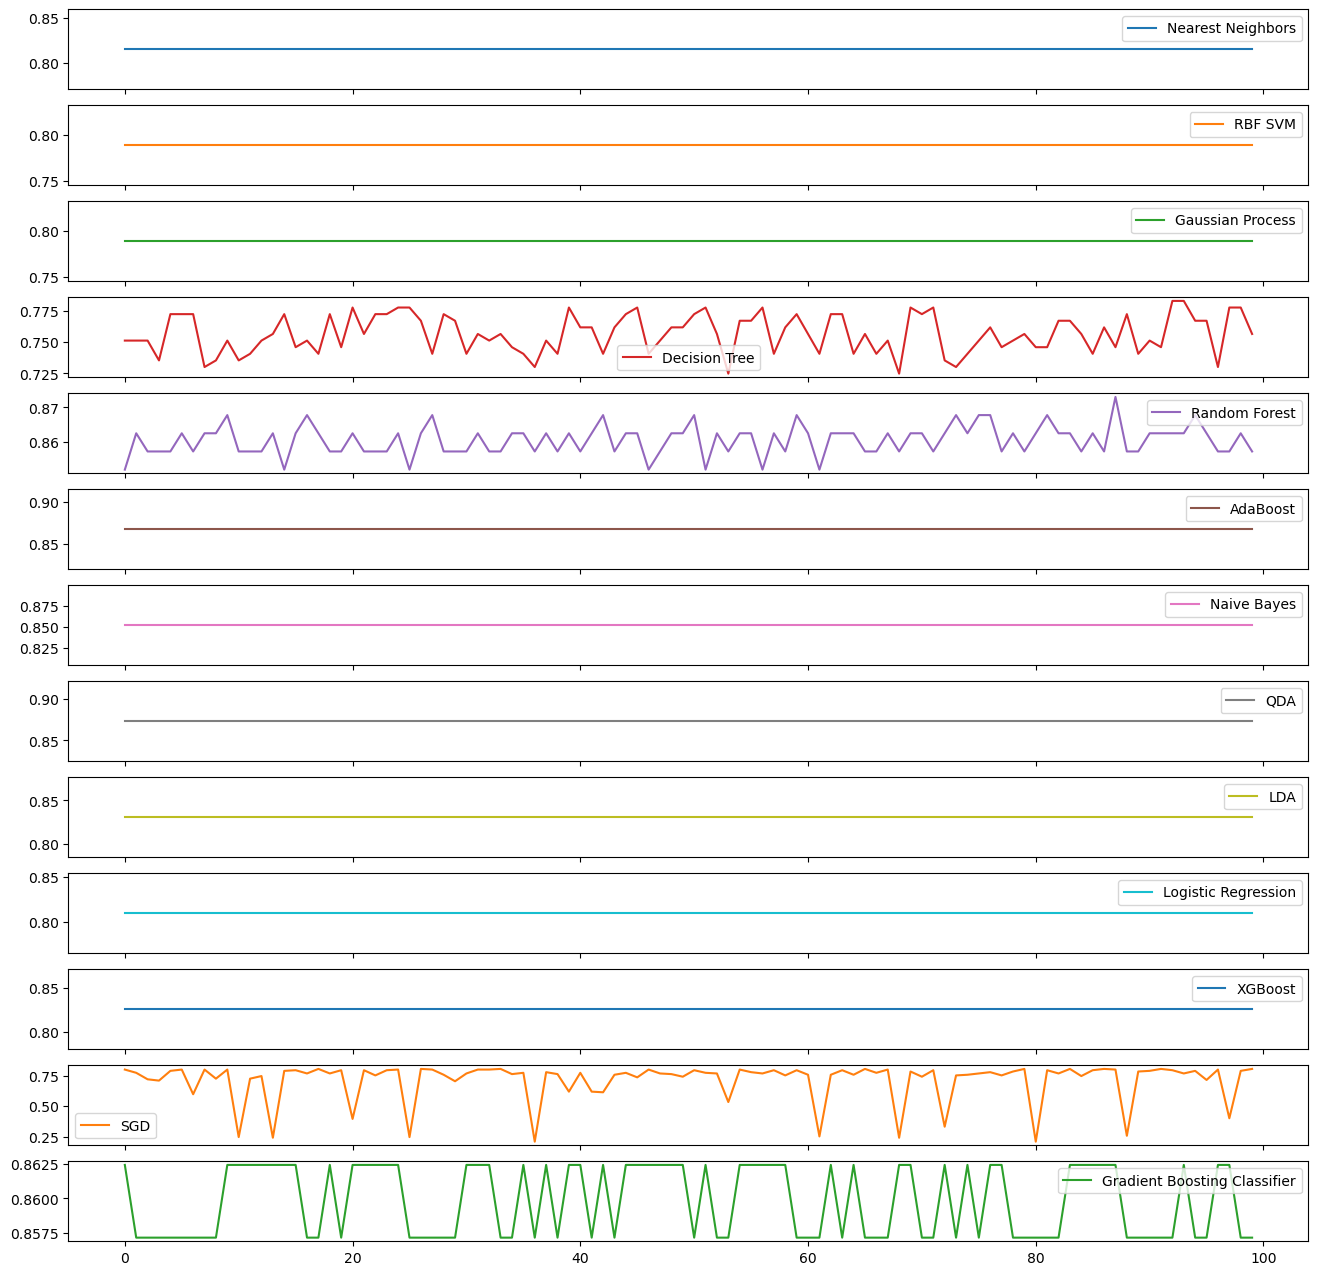

In [12]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot.

<AxesSubplot:>

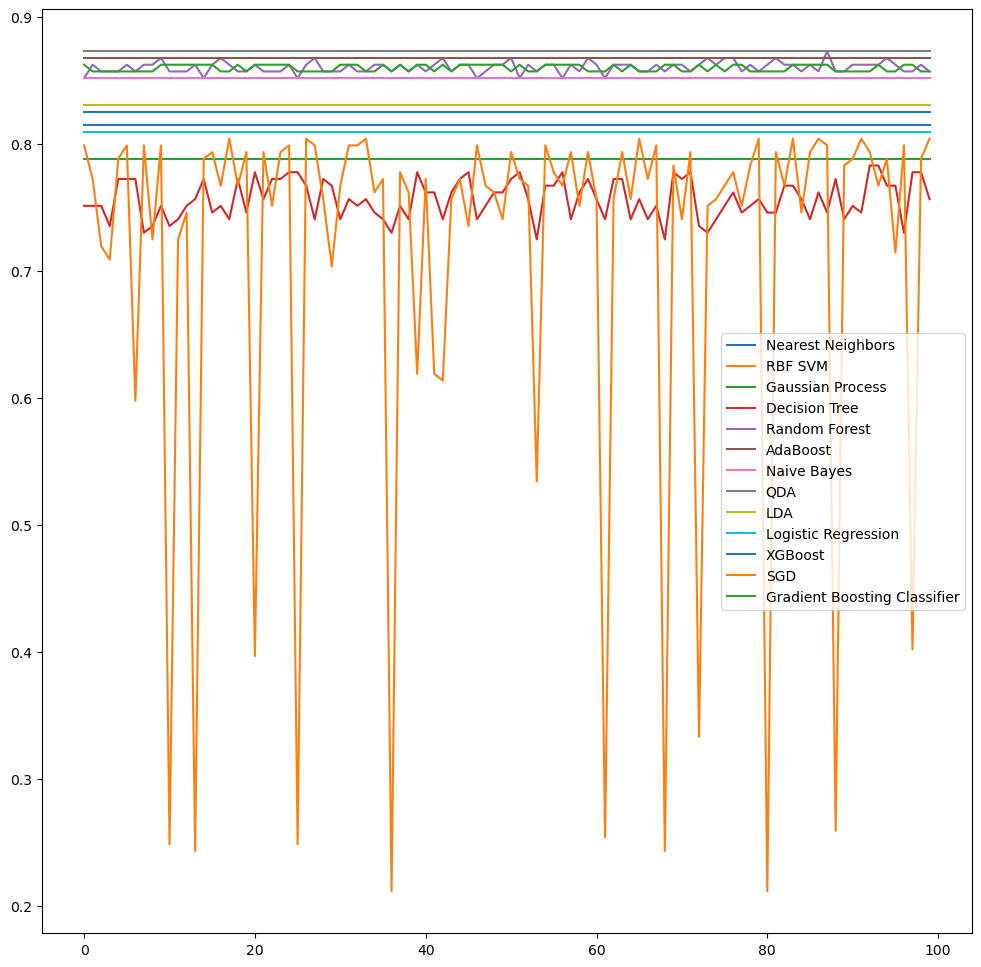

In [13]:
my_df.plot(figsize=(12,12))

<AxesSubplot:>

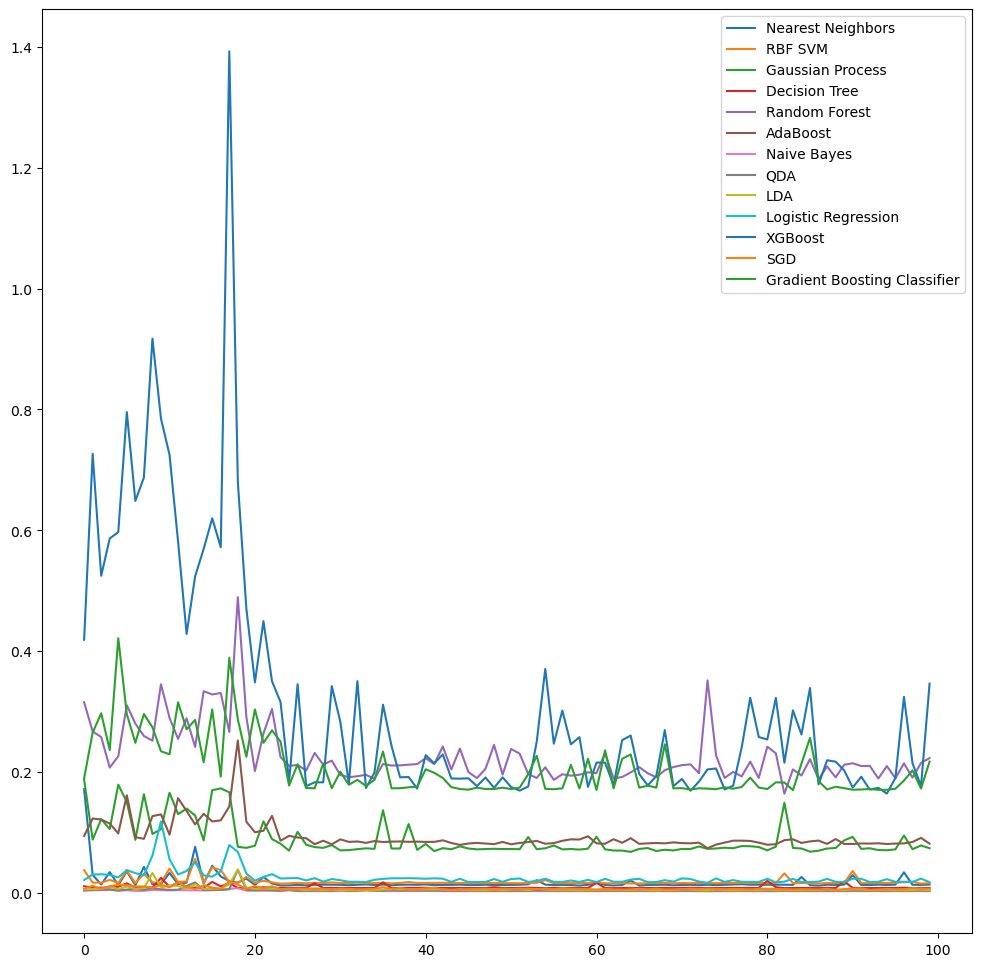

In [14]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [15]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
XGBoost,0.316611
Random Forest,0.226599
Gradient Boosting Classifier,0.206288
AdaBoost,0.093304
Gaussian Process,0.088169
Logistic Regression,0.025116
RBF SVM,0.018574
Nearest Neighbors,0.017993
Decision Tree,0.009182
SGD,0.007275


... median

In [16]:
time_median_results = []
for key in names:
    median = np.median(time_result[key])
    time_median_results.append(median)
    
timemedianDf = pd.DataFrame(data=[time_median_results], columns=names).T.sort_values(by=0, ascending=False)
timemedianDf

,0
XGBoost,0.228513
Random Forest,0.211091
Gradient Boosting Classifier,0.180684
AdaBoost,0.084721
Gaussian Process,0.073979
Logistic Regression,0.022699
RBF SVM,0.016244
Nearest Neighbors,0.013333
Decision Tree,0.008041
SGD,0.006463


# How long 100 iterations took per classifier

In [17]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
XGBoost,31.661082
Random Forest,22.659947
Gradient Boosting Classifier,20.628780
AdaBoost,9.330374
Gaussian Process,8.816882
Logistic Regression,2.511628
RBF SVM,1.857370
Nearest Neighbors,1.799320
Decision Tree,0.918180
SGD,0.727504


# Average accuracy of each classifier based on 100 runs

In [18]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
QDA,0.873016
AdaBoost,0.867725
Random Forest,0.860423
Gradient Boosting Classifier,0.859788
Naive Bayes,0.851852
LDA,0.830688
XGBoost,0.825397
Nearest Neighbors,0.814815
Logistic Regression,0.809524
RBF SVM,0.788360


# Median accuracy of each classifier based on 100 runs

In [19]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
QDA,0.873016
AdaBoost,0.867725
Random Forest,0.862434
Gradient Boosting Classifier,0.859788
Naive Bayes,0.851852
LDA,0.830688
XGBoost,0.825397
Nearest Neighbors,0.814815
Logistic Regression,0.809524
RBF SVM,0.788360


## Results

When looking only accuracies, it seems that the best performing classifier is Gradient Boosting Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. But what about runtime?  
Next, we are going to rank classifers based on how they ranked in accuracy and runtime leaderboards. The higher the accuracy, the higher the rank. The lower the runtime, the higher the rank.

In [44]:
runtime_df = timeMeanDf.copy()
runtime_df['runtime_rank'] = list(reversed(range(1, len(runtime_df) + 1))) # here higher runtime is worse, so we reverse
runtime_df.rename( columns={0 :'runtime'}, inplace=True )
runtime_df.index.name = 'Classifier'

accuracy_df = meanDf.copy()
accuracy_df['accuracy_rank'] = range(1, len(accuracy_df) + 1)
accuracy_df.rename( columns={0 :'accuracy'}, inplace=True )
accuracy_df.index.name = 'Classifier'


df_merged = pd.merge(runtime_df, accuracy_df, how='inner', on = 'Classifier')
df_merged['total_rank'] = df_merged.apply(lambda row: row.runtime_rank + row.accuracy_rank, axis=1)
df_merged['total_rank'] = df_merged['total_rank'].astype('int')
df_merged = df_merged.sort_values(by=['total_rank'])
df_merged = df_merged.reset_index(level=0)
df_merged

,Classifier,runtime,runtime_rank,accuracy,accuracy_rank,total_rank
0,LDA,0.005883,3,0.910256,2,5
1,QDA,0.004948,2,0.871795,7,9
2,Naive Bayes,0.003738,1,0.865385,9,10
3,Logistic Regression,0.025621,7,0.884615,5,12
4,Gradient Boosting Classifier,0.221434,12,0.918974,1,13
5,AdaBoost,0.101005,10,0.884615,4,14
6,Random Forest,0.229766,13,0.906987,3,16
7,RBF SVM,0.012929,6,0.833333,10,16
8,Decision Tree,0.010410,4,0.807115,12,16
9,XGBoost,0.150309,11,0.884615,6,17


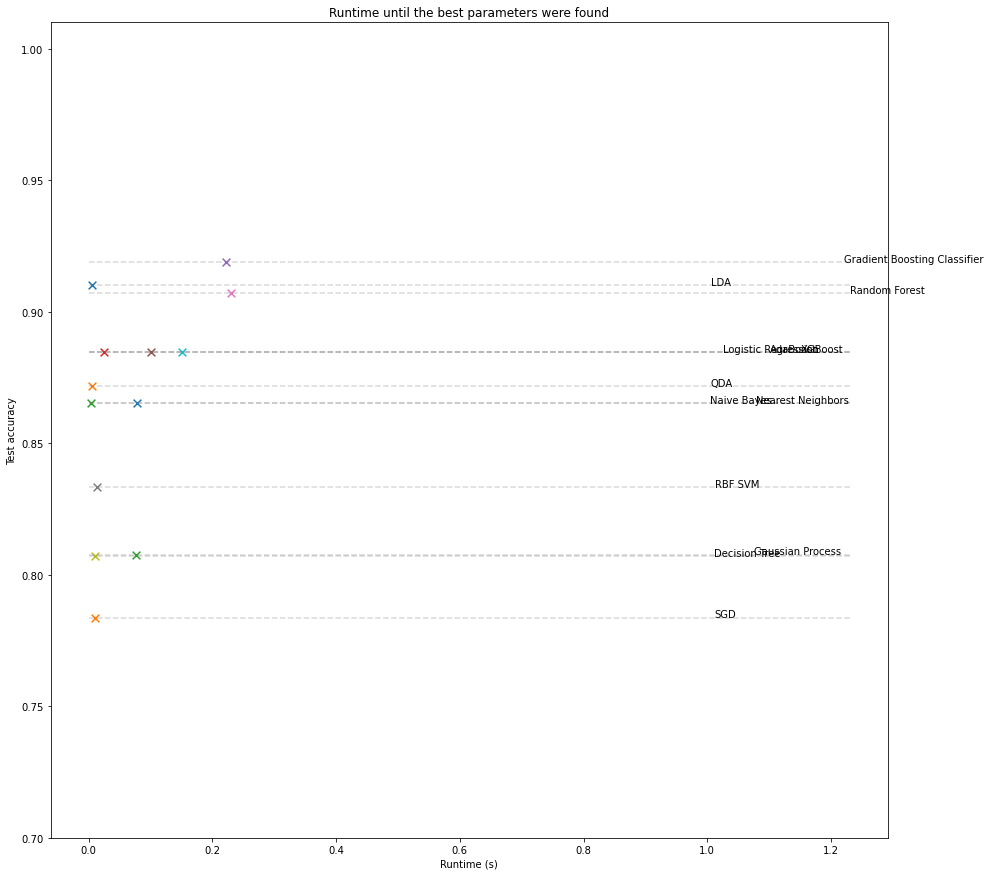

In [48]:
plt.figure(figsize = [15, 15])

for i in range(len(df_merged)):
    # Add classifier values
    plt.scatter(df_merged['runtime'][i], 
            df_merged['accuracy'][i], 
            label = df_merged['Classifier'][i],
               marker = 'x',
               s = 60)
    # Add a dashed lined marking the best accuracy threshold for classifier
    plt.hlines(y = df_merged['accuracy'][i], 
               xmin=0, 
               xmax = np.max(df_merged['runtime'])+1,
              linestyles = 'dashed', alpha = 0.3, color = 'grey')
    # Add classifier name
    plt.annotate(df_merged['Classifier'][i], 
                 (df_merged['runtime'][i]+1, 
                  df_merged['accuracy'][i]),
                )
plt.ylim(bottom = 0.70, top = 1.01)
plt.xlabel('Runtime (s)')
plt.ylabel('Test accuracy')
plt.title('Runtime until the best parameters were found')
plt.show();

So, even though Gradient Boosting Classifer achieved the accuracy of 0.918974, the LDA classifer performed only 1% worse (0.008 points), but achieved the result 37.6 times faster (0.221434/0.005883). 